In [354]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mlb
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

In [355]:
#sns.set(style="whitegrid", context="talk")
sns.set(style="whitegrid")
sns.set_color_codes("dark")

today = datetime.now().strftime('%d-%m-%Y')
week_num = datetime.now().strftime('%W')

risk_set_a = set(['1H','2H','3H'])
risk_set_b = set(['4H','5H','6V','7V','8H'])
risk_set_c = set(['9V','10V'])
risk_set_d = set(['11H','11V','12H','12V','13aH','13aV','13bH','13bV','14H','14V','15V','16V','17V','18H','18V','19V','20H','20V'])
risk_set_e = set(['21V','22V','23V','24V','25V','26V','27V','28V','29H','30H','31H','32H','32V','33V','34V','35H','36H','37H','37V','38H',
             '38V','39H','39V','40H','40V','41H','41V','42H','42V','43H','43V'])
risk_set_f = set(['44V','45V','46H','46V','47H','47V','48H','48V','49H','49V','50H','51V','52H','52V','53V','54V','55V','56V','57H','57V','58H'])
risk_set_g = set(['59V','60H','61H','61V','62H','62V','63H','64H','65H','66H','67H','68H','69H','69V','70V','71V','72V','73H'])
risk_set_h = set(['74V','75H','76H','76V','77V'])
risk_set_i = set(['78V','79H','79V','80H'])


In [356]:
week_num

'18'

In [357]:
PRACTICE = 'All'
FOLDER = '/030518'

In [358]:
os.chdir(u'/home/andy/dev/notebooks/Transfer-RS-Feedback/RS_FEEDBACK/'+PRACTICE+FOLDER)

In [359]:
pwd

u'/home/andy/dev/notebooks/Transfer-RS-Feedback/RS_FEEDBACK/All/030518'

In [360]:
iot_set = set([67,68,89,90,91,94,97,101,102,103,109,110])
cloud_set = set([43,44,46,16,49,52,54,55,56,57,59,62,63,64,176,189,117,116])
connectivity_set = set([10,12,21,22,24,27,28,29,31,33,42,66,72,80,81,118,121,156,158])
eit_set = set([126,136,141,128,130,129,198,127,1])
uc_set = set([2,4,5,7,8,9,14,70,71,87,123,193,194,195,147])

iot_cols = [67,68,89,90,91,94,97,101,102,103,109,110]
cloud_cols = [43,44,46,16,49,52,54,55,56,57,59,62,63,64,176,189,117,116]
connectivity_cols = [10,12,21,22,27,28,29,31,33,42,66,72,80,81,118,121,156,158]
eit_cols = [126,136,141,128,130,129,198,127,1]
uc_cols = [2,4,5,7,8,9,14,70,71,87,123,193,194,195,147]

all_set.update(iot_set)
all_set.update(cloud_set)
all_set.update(connectivity_set)
all_set.update(eit_set)
all_set.update(uc_set)


In [361]:
first = True
file_count = 0
product_id = 0

for filename in os.listdir(os.getcwd()):
    df = pd.read_excel(filename, sheet_name=None)
    
    file_count = file_count + 1
    
    sheet_names = df.keys()
    sheets = sheet_names[4:-1]

    print filename
    
    product_id = int(filename[11:14])
    print product_id
    all_set.remove(product_id)

    entity_count = len(sheets)
    print("Entity count: {0:d}".format(entity_count))
    
    for sh in sheets:
        print sh
        if sh == u'PII Data Record': #this is an odd bug!
            print "this is odd! PII Data"
            continue
        df[sh].insert(loc=0, column='Filename', value=filename)
        df[sh].insert(loc=1, column='Product ID', value=product_id)
        df[sh].drop(0, inplace=True)
        df[sh]['Response'].fillna('No Response', inplace=True)
        df[sh]['Remediation Project Ref'].fillna('No Response', inplace=True)
        df[sh]['Response Comments'].fillna('', inplace=True)
        df[sh]['Delivery Date'].fillna('', inplace=True)
        df[sh]['Compliance Assessment'].fillna('N/A', inplace=True)
        if first:
            out_df = df[sh][['Filename',\
                             'Product ID',\
                             'Req Ref',\
                             'Req nr',\
                             'Compliance Assessment',\
                             'Response',\
                             'Response Comments',\
                             'Delivery Date',\
                             'Remediation Project Ref']].copy()
            out_df['Entity Count'] = entity_count
            first = False
        else:
            cp_df = df[sh][['Filename',\
                            'Product ID',\
                            'Req Ref',\
                            'Req nr',\
                            'Compliance Assessment',\
                            'Response',\
                            'Response Comments',\
                            'Delivery Date',\
                            'Remediation Project Ref']].copy()
            out_df['Entity Count'] = entity_count
            out_df = pd.concat([out_df, cp_df], axis=0, ignore_index=True, copy=True)
            
print file_count

GDPR-RS-EPS176-IoT-Analytics-V4.0 REVIEWED-(02-05-2018).xlsx
176
Entity count: 1
A - IoT Analytics
GDPR-RS-EPS054-Hosting Solution Management-V4.0 RELEASED.xlsx
54
Entity count: 1
A - AIM
GDPR-RS-EPS024-Device Lifecycle Management-V4.0 RELEASED.xlsx
24
Entity count: 1
A - DLM
GDPR-RS-EPS117-SaaS-Marketplace-V4.1-REVIEWED-(02-05-2018).xlsx
117
Entity count: 1
A - SaaS Marketplace
GDPR-RS-EPS008-VCC-V4.0 Reviewed 2.05 IB.xlsx
8
Entity count: 5
A - Portal
B - Business Logic
C - Halo - HUC
D - Database
E - Miscellaneous
GDPR-RS-EPS021-VTR-V4.0 RELEASED.xlsx
21
Entity count: 4
A - Portal
B - Business Logic
C - VTR App Server
D - Database
GDPR-RS-EPS066-Process Tracker-V4.0 RELEASED.xlsx
66
Entity count: 1
A - Process Tracker
GDPR-RS-EPS068-GDSP IT-V4.1 REVIEWED 020518.xlsx
68
Entity count: 5
A - Portal
B - Business Logic
C - Data Exposure
D - NW Integration
E - Database
GDPR-RS-EPS129-Service Now-V4.0 RELEASED.xlsx
129
Entity count: 1
A - Service Now
GDPR-RS-EPS097-AEP IEP-V4.1 REVIEWED 020

In [362]:
#missing products
all_set

set()

In [363]:
iot_set

{67, 68, 89, 90, 91, 94, 97, 101, 102, 103, 109, 110}

In [364]:
#out_df[out_df['Req Ref'].str.contains("EPS118-PCA-76V")]

#add product column
out_df['Product Ref'] = out_df['Req Ref'].str.slice(0, -2)

out_df['Product ID'] = out_df['Req Ref'].str.slice(3, 6)

out_df['Category'] = out_df['Req Ref'].str.slice(7, 10)

#out_df.drop_duplicates(['Product Ref'], keep='first', inplace=True)

mapping = {'No Response':'No Project Code'}

out_df['Orphan'] = out_df['Remediation Project Ref'].map(lambda x: mapping.get(x, 'Project Code Allocated'))

#out_df[out_df['Product ID'] == '022'].head(50)
#out_df.head()

In [365]:
def return_practice( prod_id ):
    #print int(prod_id)
    if int(prod_id) in iot_set:
        return 'IoT'
    elif int(prod_id) in cloud_set:
        return 'Cloud'
    elif int(prod_id) in connectivity_set:
        return 'Connectivity'
    elif int(prod_id) in eit_set:
        return 'EIT'
    elif int(prod_id) in uc_set:
        return 'UC'
    else:
        print "Unknown Practice"
        return 'Unknown Practice'

out_df['Product ID'].dropna(inplace=True)    
    
out_df['Practice'] = out_df['Product ID'].map(lambda x: return_practice(x))

176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
176
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
117
117
117
117
117
117
117
117
117
117
117
117
117
117
117
117
117
117
117
117
117
117
117
117
117
117
117
117
117
117
117
117
117
117
117
117
117
117
117
117
117
117
117
117
117
117
117
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8

In [366]:
def return_risk_set( req_id ):
    if req_id in risk_set_a:
        return 'A'
    elif req_id in risk_set_b:
        return 'B'
    elif req_id in risk_set_c:
        return 'C'
    elif req_id in risk_set_d:
        return 'D'
    elif req_id in risk_set_e:
        return 'E'
    elif req_id in risk_set_f:
        return 'F'
    elif req_id in risk_set_g:
        return 'G'
    elif req_id in risk_set_h:
        return 'H'
    elif req_id in risk_set_i:
        return 'I'
    else:
        return 'UNKNOWN'
    
out_df['Risk Category'] = out_df['Req nr'].map(lambda x: return_risk_set(x))

    

In [367]:
out_df['Approved by DPO:'] = ""
out_df['If Approved, change to ?'] = ""
out_df['New Comment to be inserted into RS and DPIA'] = ""

In [368]:
#FIXME: Bug!
out_df['Product ID'].fillna('dropme',inplace=True)

my_filter = (out_df['Filename']=='GDPR-RS-EPS103-SmartCities-V4.1 REVIEWED 020518 (1).xlsx') & (out_df['Product ID']=='dropme')

labels=out_df[my_filter].index
out_df.drop(axis=0, labels=labels,inplace=True)
out_df[out_df['Filename']=='GDPR-RS-EPS103-SmartCities-V4.1 REVIEWED 020518 (1).xlsx']

,Compliance Assessment,Delivery Date,Entity Count,Filename,Product ID,Remediation Project Ref,Req Ref,Req nr,Response,Response Comments,Product Ref,Category,Orphan,Practice,Risk Category,Approved by DPO:,"If Approved, change to ?",New Comment to be inserted into RS and DPIA
7107,NON-COMPLIANT,2018-05-18 00:00:00,1.0,GDPR-RS-EPS103-SmartCities-V4.1 REVIEWED 02051...,103,GE-PCA-4H,EPS103-PCA-4H-A,4H,Acknowledged,Acknowledged as horizontal,EPS103-PCA-4H,PCA,Project Code Allocated,IoT,B,,,
7108,NON-COMPLIANT,2018-09-25 00:00:00,1.0,GDPR-RS-EPS103-SmartCities-V4.1 REVIEWED 02051...,103,IOT-009,EPS103-PCA-51V-A,51V,Acknowledged,Confirmed by Tim Snape,EPS103-PCA-51V,PCA,Project Code Allocated,IoT,F,,,
7109,NON-COMPLIANT,2018-05-01 00:00:00,1.0,GDPR-RS-EPS103-SmartCities-V4.1 REVIEWED 02051...,103,GE-PCA-57H,EPS103-PCA-57H-A,57H,Acknowledged,Acknowledged as horizontal,EPS103-PCA-57H,PCA,Project Code Allocated,IoT,F,,,
7110,NON-COMPLIANT,2018-05-25 00:00:00,1.0,GDPR-RS-EPS103-SmartCities-V4.1 REVIEWED 02051...,103,"IOT-001, IOT-011, IOT-015",EPS103-PCA-57V-A,57V,Acknowledged,Confirmed by Tim Snape,EPS103-PCA-57V,PCA,Project Code Allocated,IoT,F,,,
7111,NON-COMPLIANT,2018-05-25 00:00:00,1.0,GDPR-RS-EPS103-SmartCities-V4.1 REVIEWED 02051...,103,GE-PCA-58H,EPS103-PCA-58H-A,58H,Acknowledged,Acknowledged as horizontal,EPS103-PCA-58H,PCA,Project Code Allocated,IoT,F,,,
7112,NON-COMPLIANT,2018-05-18 00:00:00,1.0,GDPR-RS-EPS103-SmartCities-V4.1 REVIEWED 02051...,103,GE-PCA-66H,EPS103-PCA-66H-A,66H,Acknowledged,Acknowledged as horizontal,EPS103-PCA-66H,PCA,Project Code Allocated,IoT,G,,,
7113,NON-COMPLIANT,2018-05-18 00:00:00,1.0,GDPR-RS-EPS103-SmartCities-V4.1 REVIEWED 02051...,103,GE-PCA-67H,EPS103-PCA-67H-A,67H,Acknowledged,Acknowledged as horizontal,EPS103-PCA-67H,PCA,Project Code Allocated,IoT,G,,,
7114,NON-COMPLIANT,2018-04-30 00:00:00,1.0,GDPR-RS-EPS103-SmartCities-V4.1 REVIEWED 02051...,103,GE-PCA-73H,EPS103-PCA-73H-A,73H,Acknowledged,Acknowledged as horizontal,EPS103-PCA-73H,PCA,Project Code Allocated,IoT,G,,,
7115,PARTIALLY COMPLIANT,2018-05-18 00:00:00,1.0,GDPR-RS-EPS103-SmartCities-V4.1 REVIEWED 02051...,103,GE-PCA-2H,EPS103-PCA-2H-A,2H,Acknowledged,Acknowledged as horizontal,EPS103-PCA-2H,PCA,Project Code Allocated,IoT,A,,,
7116,PARTIALLY COMPLIANT,2018-04-30 00:00:00,1.0,GDPR-RS-EPS103-SmartCities-V4.1 REVIEWED 02051...,103,GE-PCA-11H,EPS103-PCA-11H-A,11H,Acknowledged,Acknowledged as horizontal,EPS103-PCA-11H,PCA,Project Code Allocated,IoT,D,,,


In [369]:
#out_df[out_df['Filename']=='GDPR-RS-EPS103-SmartCities-V4.1 REVIEWED 020518 (1).xlsx']

In [370]:
output_writer = pd.ExcelWriter('../'+PRACTICE+'-REMEDIATION-STATS-Week'+week_num+'-'+today+'.xlsx')
out_df.to_excel(output_writer, 'REMEDIATION STATS')
output_writer.save()

Text(0.5,1,u'Chart to show all requirements and their response types: All 03-05-2018')

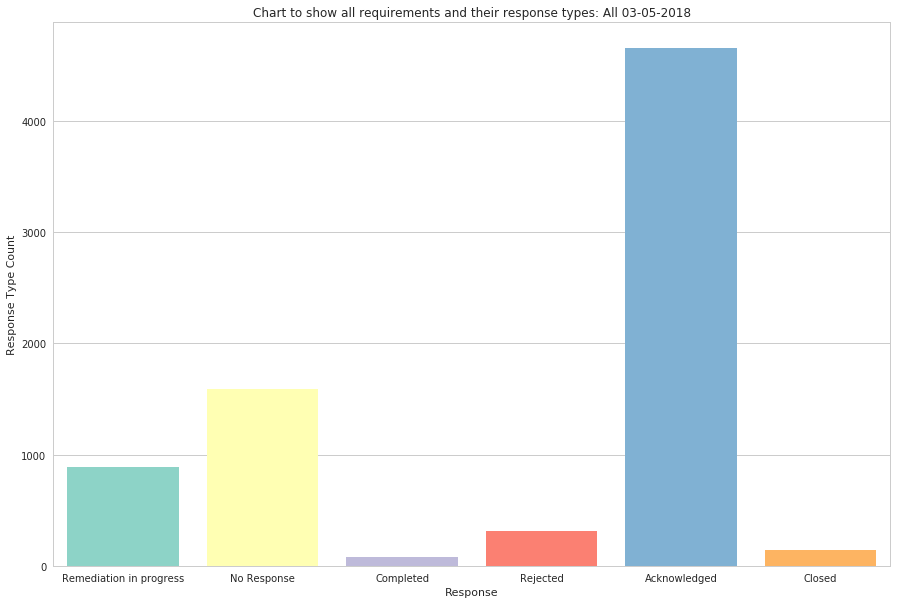

In [371]:
fig, ax = plt.subplots(figsize=(15,10))

ax = sns.countplot(data=out_df, ax=ax, x='Response', saturation=1, palette='Set3')
ax.set_ylabel("Response Type Count")
ax.set_title("Chart to show all requirements and their response types: "+PRACTICE+" "+today)

In [372]:
fig.savefig("../"+PRACTICE+"-fig-"+today+".png")

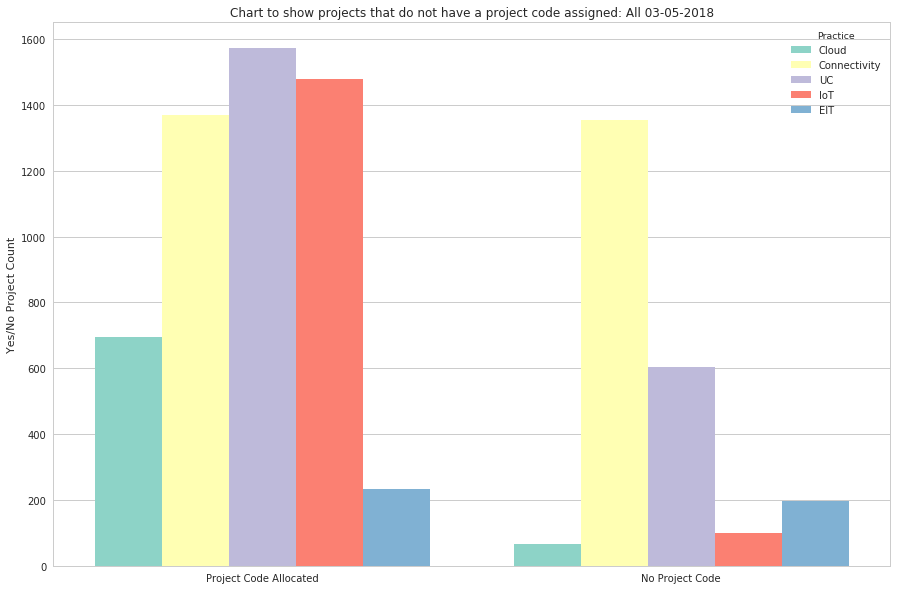

In [373]:
fig, ax = plt.subplots(figsize=(15,10))

ax = sns.countplot(data=out_df, ax=ax, x='Orphan', hue='Practice',saturation=1, palette='Set3')
ax.set_ylabel("Yes/No Project Count")
ax.set_xlabel("")
ax.set_title("Chart to show projects that do not have a project code assigned: "+PRACTICE+" "+today)

fig.savefig("../"+PRACTICE+"-project-codes-fig-"+today+".png")

In [374]:
out_df[out_df['Practice']=='Unknown Practice']

,Compliance Assessment,Delivery Date,Entity Count,Filename,Product ID,Remediation Project Ref,Req Ref,Req nr,Response,Response Comments,Product Ref,Category,Orphan,Practice,Risk Category,Approved by DPO:,"If Approved, change to ?",New Comment to be inserted into RS and DPIA


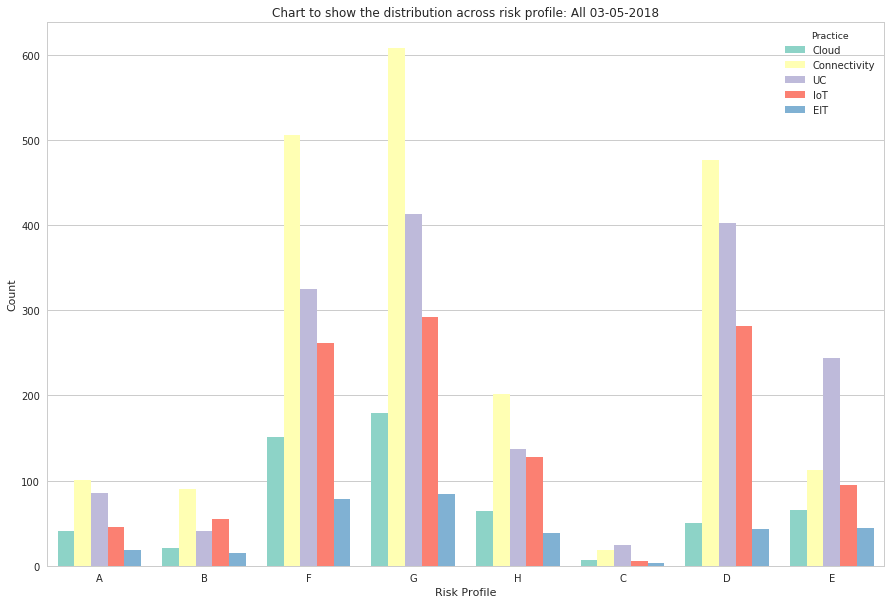

In [375]:
#out_df[out_df['Category']=='PCA']['Risk Category'].value_counts(dropna=False,sort=False)

fig, ax = plt.subplots(figsize=(15,10))

ax = sns.countplot(data=out_df[out_df['Category']=='PCA'], ax=ax, x='Risk Category', hue='Practice',saturation=1, palette='Set3')
ax.set_ylabel("Count")
ax.set_xlabel("Risk Profile")
ax.set_title("Chart to show the distribution across risk profile: "+PRACTICE+" "+today)

fig.savefig("../"+PRACTICE+"-risk-cats-fig-"+today+".png")

In [376]:
#pd.get_dummies(out_df['Response'])
out_df['Response'].value_counts()

Acknowledged               4655
No Response                1594
Remediation in progress     888
Rejected                    309
Closed                      146
Completed                    83
Name: Response, dtype: int64

In [377]:
COLUMNS = {'PRIVACY_REQUIREMENT_CONTENT', 'REQ_NO', 'VERTICAL', 'HORIZONTAL', 'HYBRID', 'PC', 'NC'}

INDEX = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

req_content = ['']
vertical = [15, ]

uc_risk_df = pd.DataFrame(columns=COLUMNS, index=INDEX)


In [378]:
uc_risk_df

,PRIVACY_REQUIREMENT_CONTENT,VERTICAL,NC,HYBRID,PC,REQ_NO,HORIZONTAL
A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H,NaN,NaN,NaN,NaN,NaN,NaN,NaN
I,NaN,NaN,NaN,NaN,NaN,NaN,NaN
J,NaN,NaN,NaN,NaN,NaN,NaN,NaN
